In [46]:
!pip install tensorflow

In [47]:
import tensorflow as tf

In [48]:
import tensorflow as tf

In [49]:
## import some basic libraries
import numpy as np
import pandas as pd

In [50]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
## Divide the features into dependent features and into independented features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [52]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [53]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [54]:
print(X.columns)  # Check available columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [55]:
## Feature Engineering
pd.get_dummies(X['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [56]:
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
print(geography.head())  # Check output


   Germany  Spain
0        0      0
1        0      1
2        0      0
3        0      0
4        0      1


In [57]:
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [58]:
## concatenate these variable with dataframe
X = X.drop(['Gender', 'Geography'],axis=1)

In [59]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [60]:
X = pd.concat([X,geography,gender],axis=1) # geography and gender column is added in the end

In [61]:
## Splitting the dataset into Training and Testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [62]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [63]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [64]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [65]:
X_train.shape

(8000, 11)

In [66]:
## Part 2 lets create the ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU # Changed LeakyRelU to LeakyReLU
from tensorflow.keras.layers import Dropout

In [67]:
### Lents intialize the ANN
classifier = Sequential()

In [68]:
## Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [69]:
# adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [70]:
# adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [71]:
# adding the output laye
classifier.add(Dense(1,activation='sigmoid'))

In [72]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
import tensorflow as tf # This line imports TensorFlow and assigns it to the alias 'tf'.
tf.keras.optimizers.Adam(learning_rate = 0.01) # This line now correctly uses the alias 'tf' to access the Adam optimizer within TensorFlow's Keras module.

In [74]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
tf.keras.callbacks.EarlyStopping( # Changed 'keras' to 'tf.keras'
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [75]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6336 - loss: 0.6398 - val_accuracy: 0.8023 - val_loss: 0.4515
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8090 - loss: 0.4358 - val_accuracy: 0.8164 - val_loss: 0.4196
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8158 - loss: 0.4091 - val_accuracy: 0.8228 - val_loss: 0.4027
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8323 - loss: 0.3820 - val_accuracy: 0.8391 - val_loss: 0.3848
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8524 - loss: 0.3659 - val_accuracy: 0.8455 - val_loss: 0.3746
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8527 - loss: 0.3490 - val_accuracy: 0.8478 - val_loss: 0.3714
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3486 - val_accuracy: 0.8432 - val_loss: 0.3700
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8646 - loss: 0.3337 -

In [77]:
model_history.history.keys() # Remove the parentheses after 'history'

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [80]:
!pip install matplotlib
import matplotlib.pyplot as plt # import the library using the standard alias 'plt'


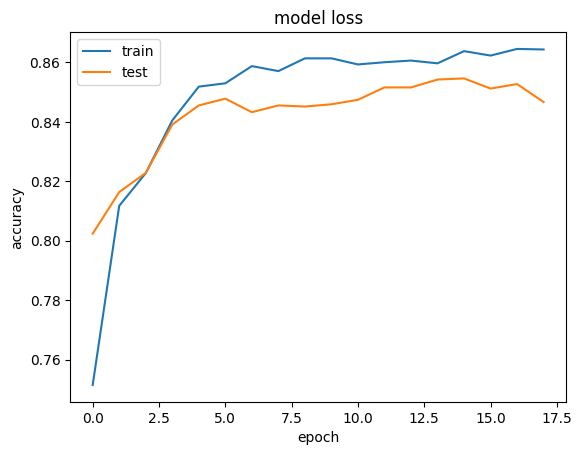

In [81]:
#summarize history for history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

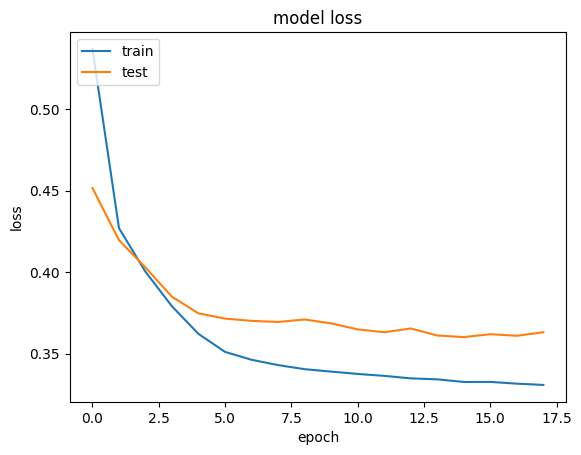

In [82]:
#summarize history for history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [83]:
# part 3 : making th eprediction and evaluting the model

# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [84]:
# make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1475,  120],
       [ 172,  233]])

In [86]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.854

In [87]:
# get the weights
classifier.get_weights()

[array([[-0.15075104, -0.1826057 , -0.20247662,  0.14738639, -0.2718378 ,
         -0.09396673,  0.2839855 ,  0.19121285, -0.04813142, -0.34521225,
         -0.16090249],
        [-0.5197286 ,  0.76154494, -0.16151068, -0.6835348 , -0.3367938 ,
          0.4770512 , -0.40943307,  0.796238  ,  0.78862673, -0.31832594,
          0.61021477],
        [ 0.35509682, -0.00148468, -0.40393814,  0.12066533, -0.47946677,
          0.09799294, -0.27523896,  0.22740753,  0.07243439,  0.28796175,
         -0.30440715],
        [ 0.03807981, -0.52775204,  0.23410356, -0.55628765,  0.36675295,
         -0.4856474 ,  0.07056329, -0.18535769,  0.02278471,  0.20907715,
         -0.38358483],
        [ 0.08840402,  0.5214155 ,  0.1306548 , -0.14451723,  0.30456507,
         -0.61482376,  0.7041832 , -0.21842526,  1.0789111 , -0.24875608,
         -0.54925734],
        [ 0.04808926,  0.08049791, -0.3525007 , -0.16967647, -0.3248175 ,
         -0.15357989,  0.01107373, -0.26621297, -0.09722237, -0.4045322